# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [3]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [7]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
df_data.tail()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [ ]:
print(f'Shape of df_data is: {df_data.shape}\n')
print(f'It has {df_data.shape[0]} rows and {df_data.shape[1]} columns\n')
print(f'Columns names are:')
for name in df_data.columns:
  print(' '+name)
print(f'\nAre there any NaN values? {df_data.isna().values.any()}\n')
print(f'Are there any duplicates? {df_data.duplicated().values.any()}')

Shape of df_data is: (4324, 9)

It has 4324 rows and 9 columns

Columns names are:
 Unnamed: 0
 Unnamed: 0.1
 Organisation
 Location
 Date
 Detail
 Rocket_Status
 Price
 Mission_Status

Are there any NaN values? True

Are there any duplicates? False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
df_data.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

Only `Price` colmuns has NaNs. Removing those rows is not recommended, because is it 77.71% of our data! 

In [ ]:
print(round(df_data.Price.isna().sum() / df_data.shape[0] * 100, 2))

77.71


## Descriptive Statistics

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
mission_launches_by_organisation = df_data.Organisation.value_counts()
top10_org = mission_launches_by_organisation[:15]
others_org = mission_launches_by_organisation[15:]
others_row = pd.Series(others_org.values.sum(), index=['Others'])

all_orgs = pd.concat([top10_org, others_row])
all_orgs

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Others               389
dtype: int64

In [ ]:
fig = px.pie(names=all_orgs.index,  values=all_orgs.values, title='Number of Launches per Company')
fig.update_layout(yaxis={'categoryorder':'total ascending'})

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
df_data.Rocket_Status.value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

There are 3534 decomissioned rockets to 790 active.

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
successful_missions = df_data.Mission_Status.value_counts()['Success']
failed_missions = df_data.Mission_Status.value_counts().sum() - successful_missions
print(f'There are {successful_missions} successful missions')
print(f'There are {failed_missions} failed missions')
print(f'Success rate is {successful_missions / (successful_missions + failed_missions) * 100:.3}%')

There are 3879 successful missions
There are 445 failed missions
Success rate is 89.7%


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [11]:
price_dist = df_data.Price.dropna().replace(',','')

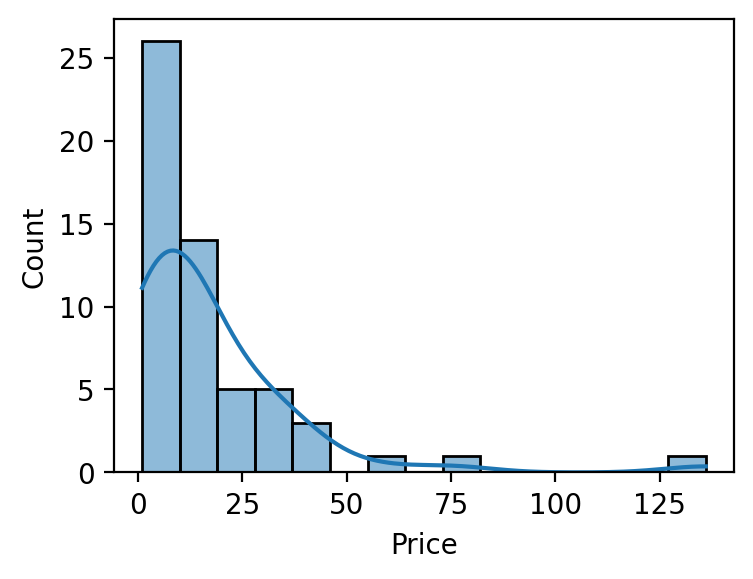

In [ ]:
plt.figure(figsize=(4,3), dpi=200)
sns.histplot(price_dist.value_counts(), kde=True)
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
locations = df_data.Location.transform(lambda x: x.split(', ')[-1]).value_counts()
locations.rename({'Russia': 'Russian Federation',
                  'New Mexico': 'USA',
                  'Yellow Sea': 'China',
                  'Iran': 'IR',
                  'Shahrud Missile Test Site': 'IR',
                  'Barents Sea': 'Russian Federation',
                  'Gran Canaria': 'USA',
                  'North Korea': "KP",
                  'South Korea': "KR",
                  'Pacific Missile Range Facility': 'USA',
                  'Pacific Ocean': 'Switzerland'},
                 inplace=True)

from iso3166 import countries

df_locations = pd.DataFrame({'locations': locations.index, 'launches': locations.values})
df_locations.launches = df_locations.groupby('locations')['launches'].transform('sum')
df_locations.drop_duplicates(inplace=True)
df_locations['alpha3'] = df_locations.locations.transform(lambda x: countries.get(x).alpha3)
df_locations.sort_values(by=['launches'], inplace=True)

In [ ]:
fig = px.choropleth(df_locations, 
                    locations='alpha3', 
                    color='launches', 
                    hover_name="locations", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Number of Launches by Country")
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
country_dict = {'Russia': 'Russian Federation',
                  'New Mexico': 'USA',
                  'Yellow Sea': 'China',
                  'Iran': 'IR',
                  'Shahrud Missile Test Site': 'IR',
                  'Barents Sea': 'Russian Federation',
                  'Gran Canaria': 'USA',
                  'North Korea': "KP",
                  'South Korea': "KR",
                  'Pacific Missile Range Facility': 'USA',
                  'Pacific Ocean': 'Switzerland'}

df_loc_failed = df_data[df_data.Mission_Status != 'Success']
locations_fail = df_loc_failed.Location.transform(lambda x: x.split(', ')[-1]).value_counts()
locations_fail.rename(country_dict,
                 inplace=True)

locations_fail = pd.DataFrame({'locations': locations_fail.index, 'launches_failed': locations_fail.values})
locations_fail.launches_failed = locations_fail.groupby('locations')['launches_failed'].transform('sum')
locations_fail.drop_duplicates(inplace=True)
locations_fail['alpha3'] = locations_fail.locations.transform(lambda x: countries.get(x).alpha3)
locations_fail.sort_values(by=['launches_failed'], inplace=True)

In [ ]:
fig = px.choropleth(locations_fail, 
                    locations='alpha3', 
                    color='launches_failed', 
                    hover_name="locations", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Number of Failures by Country")
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
df_data['Country'] = df_data.Location.transform(lambda x: x.split(', ')[-1]).replace(country_dict)
df_sunburst = df_data.groupby(by=['Country','Organisation', 'Mission_Status'], as_index=False).agg(total=('Mission_Status', 'count'))
df_sunburst

,Country,Organisation,Mission_Status,total
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1
...,...,...,...,...
127,USA,US Air Force,Success,129
128,USA,US Navy,Failure,14
129,USA,US Navy,Partial Failure,1
130,USA,US Navy,Success,2


In [ ]:
fig = px.sunburst(df_sunburst, path=['Country', 'Organisation', 'Mission_Status'], values='total', color='Mission_Status')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
 clean_price = df_data.dropna()
 clean_price.Price = pd.to_numeric(clean_price.Price.str.replace(',',''))
 clean_price = clean_price.groupby(by=['Organisation'], as_index=False).agg(sum=('Price', 'sum'))
 clean_price.sort_values(by='sum', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.bar(clean_price, x="sum", y="Organisation", color="sum", title="Money Spent by Organisation on Space Missions", height=800)
fig.layout.xaxis.title='Sum in 000 000s'
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
clean_launches = df_data.dropna()
clean_launches = clean_launches.groupby('Organisation', as_index=False).agg(count=('Organisation', 'count'))

In [ ]:
#money per lanuch
df_mpl = pd.merge(clean_price, clean_launches)

In [ ]:
df_mpl['money_per_lanuch'] = df_mpl['sum'] / df_mpl['count']
df_mpl.sort_values(by='money_per_lanuch', inplace=True)

In [ ]:
fig = px.bar(df_mpl, x="money_per_lanuch", y="Organisation", color="money_per_lanuch", title="Money Spent by Organisation on Space Missions", height=800)
fig.layout.xaxis.title='Money speny per lanuch in 000 000s'
fig.show()

Why is RVSN USSR lanuch so expensvie? Let's investigate.

In [ ]:
df_rvsn = df_data.dropna()
df_rvsn = df_rvsn[df_rvsn.Organisation == 'RVSN USSR']
df_rvsn

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
1916,1916,1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.0",Success,Kazakhstan
2000,2000,2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.0",Success,Kazakhstan


1.   There are only 2 rows that meet our criteria, so sample size is too small
2.   Price for whatever reason are set **really high**



# Chart the Number of Launches per Year

In [ ]:
years = pd.to_datetime(df_data['Date'], utc=True).dt.year
years = years.value_counts()
years.sort_index(inplace=True)

In [ ]:
fig = px.line(years, x=years.index, y=years.values, markers=True)
fig.update_layout(title='Number of Launches per Year',
                   xaxis_title='Year',
                   yaxis_title='Number of lanuches')
fig.show(renderer='colab')

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
years_months = pd.to_datetime(df_data['Date'], utc=True).dt.to_period('M')
years_months = years_months.value_counts()
years_months.sort_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [ ]:
years_months

1957-10     1
1957-11     1
1957-12     1
1958-02     2
1958-03     3
           ..
2020-04     5
2020-05     9
2020-06     7
2020-07    14
2020-08     3
Freq: M, Name: Date, Length: 747, dtype: int64

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

rolling = years_months.rolling(6).mean()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Bar(x=years_months.index.to_timestamp(), y=years_months.values, name="Launches"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=rolling.index.to_timestamp(), y=rolling.values, name="Rolling Average"),
    secondary_y=True,
)

fig.update_layout(title='Number of Launches per Year',
                   xaxis_title='Year',
                   yaxis_title='Number of lanuches')
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
launches_per_month = pd.to_datetime(df_data['Date'], utc=True)
launches_per_month = launches_per_month.dt.month.value_counts()
launches_per_month.sort_index(inplace=True)

In [ ]:
fig = px.bar(launches_per_month, 
             x=launches_per_month.index, 
             y=launches_per_month.values, 
             title="Launches per Month", 
             text_auto='.2s')

fig.update_layout(title='Number of Launches per Year',
                   xaxis_title='Months',
                   yaxis_title='Number of lanuches')
fig.show()

Most popular months are December and June. Least popular is January

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [13]:
price_over_time = df_data.dropna()
price_over_time['year'] = pd.to_datetime(price_over_time.Date, utc=True).dt.year
price_over_time.Price = pd.to_numeric(price_over_time.Price.str.replace(',',''))
price_over_time = price_over_time.groupby(['year'], as_index=False).agg(sum=('Price','sum'), count=('Price','count'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
price_over_time['launch_price'] = price_over_time['sum'] / price_over_time['count']

In [ ]:
fig = px.line(x=price_over_time.year, y=price_over_time['launch_price'], markers=True)
fig.update_layout(title='Launch Price varied Over Time',
                   xaxis_title='Years',
                   yaxis_title='Price per year in 000 000s $')

Price went down over the years

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [8]:
top10_org_names = df_data.Organisation.value_counts()[:10]
df_top10 = df_data.loc[df_data['Organisation'].isin(top10_org_names.index)]

In [9]:
df_top10['year'] = pd.to_datetime(df_top10.Date, utc=True).dt.year
df_top10 = df_top10.groupby(['Organisation', 'year'], as_index=False).agg(count=('Unnamed: 0.1', 'count'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
fig = px.line(df_top10, x=df_top10.year, y='count', color='Organisation')
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [25]:
df_data['Year'] = pd.to_datetime(df_data.Date, utc=True).dt.year

In [26]:
df_data['Country'] = df_data.Location.transform(lambda x: x.split(', ')[-1])

In [55]:
cold_war = df_data.loc[df_data['Country'].isin(['USA','Russia', 'Kazakhstan', 'Barents Sea', 'New Mexico', 'Pacific Missile Range Facility'])]
cold_war = cold_war.loc[cold_war.Year <= 1991].replace('Kazakhstan', 'Russia')

In [57]:
cold_war_chart = cold_war.groupby(['Country', 'Year'], as_index=False).agg(count=('Year', 'count'))

In [58]:
fig = px.line(cold_war_chart, x='Year', y='count', color='Country', title='Launches through cold war')
fig.show()

In [59]:
fig = px.bar(cold_war_chart, x="Year", y="count", color="Country", title="Launches through cold war")
fig.show()

##Total Number of Mission Failures Year on Year.

In [70]:
cold_war_failiure = cold_war.loc[cold_war.Mission_Status != 'Success']
cold_war_failiure = cold_war_failiure.groupby(['Country', 'Year'], as_index=False).agg(count=('Mission_Status', 'count'))
fig = px.bar(cold_war_failiure, x="Year", y="count", color="Country", title="Failures through cold war")
fig.show()